In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud=pd.read_csv(r'C:\Users\admin\Downloads\Fraud Detection Dataset.csv')

In [3]:
fraud

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0


In [4]:
fraud.tail()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0
50999,T13665,2315,814.72,POS Payment,3.0,Tablet,Los Angeles,0,50,10,Invalid Method,0


In [5]:
fraud.shape

(51000, 12)

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [7]:
fraud.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'],
      dtype='object')

In [8]:
len(fraud.columns)

12

In [9]:
fraud.isnull()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,False,False,False,False,False,False,False,False,False,False,False,False
50996,False,False,False,False,False,False,False,False,False,False,False,False
50997,False,False,False,False,False,False,False,False,False,False,False,False
50998,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
fraud.dtypes

Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object

In [11]:
fraud.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [12]:
fraud['Transaction_Amount']=fraud['Transaction_Amount'].fillna(np.mean(pd.to_numeric(fraud['Transaction_Amount'])))
fraud['Time_of_Transaction']=fraud['Time_of_Transaction'].fillna(np.mean(pd.to_numeric(fraud['Time_of_Transaction'])))
fraud['Device_Used']=fraud['Device_Used'].fillna(fraud['Device_Used'].mode()[0])
fraud['Location']=fraud['Location'].fillna(fraud['Location'].mode()[0])
fraud['Payment_Method']=fraud['Payment_Method'].fillna(fraud['Payment_Method'].mode()[0])

In [13]:
fraud.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [14]:
fraud.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,51000.000000,51000.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,4917.736637,6.747518,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1333.787500,6.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2656.165000,11.488400,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3724.987500,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [15]:
fraud.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,51000.0,3005.110176,1153.121107,1000.00,2007.0000,2996.0000,4006.0000,4999.0
Transaction_Amount,51000.0,2996.249784,4917.736637,5.03,1333.7875,2656.1650,3724.9875,49997.8
Time_of_Transaction,51000.0,11.488400,6.747518,0.00,6.0000,11.4884,17.0000,23.0
Previous_Fraudulent_Transactions,51000.0,1.995725,1.415150,0.00,1.0000,2.0000,3.0000,4.0
Account_Age,51000.0,60.033902,34.384131,1.00,30.0000,60.0000,90.0000,119.0
Number_of_Transactions_Last_24H,51000.0,7.495588,4.020080,1.00,4.0000,7.0000,11.0000,14.0
Fraudulent,51000.0,0.049216,0.216320,0.00,0.0000,0.0000,0.0000,1.0


In [16]:
fraud.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


<Axes: xlabel='Transaction_Amount', ylabel='Density'>

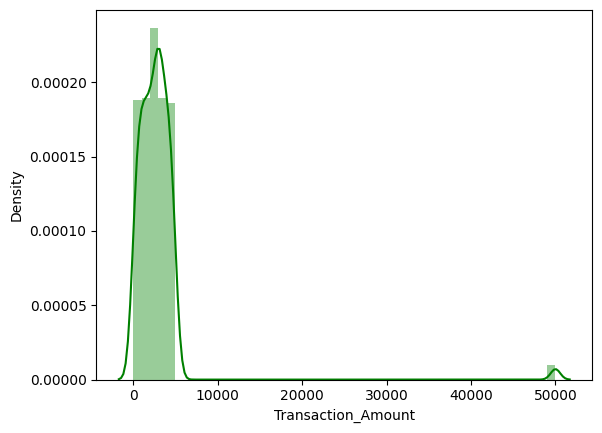

In [17]:
sns.distplot(fraud.Transaction_Amount , color='g')

<Axes: xlabel='Time_of_Transaction', ylabel='Density'>

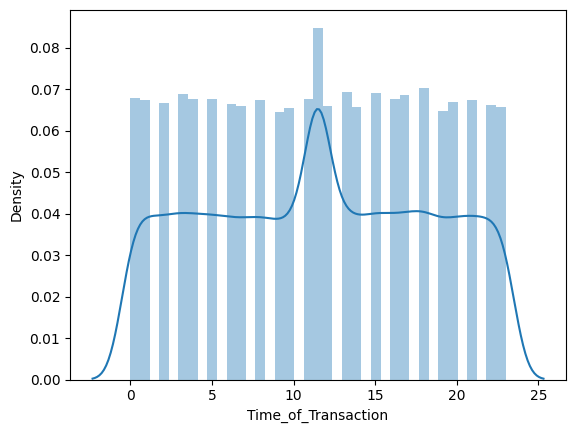

In [18]:
sns.distplot(fraud.Time_of_Transaction)

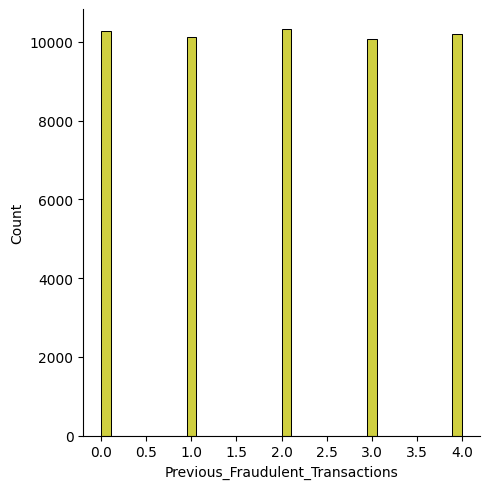

In [19]:
sns.displot(fraud.Previous_Fraudulent_Transactions,color='y')

<Axes: xlabel='Account_Age', ylabel='Density'>

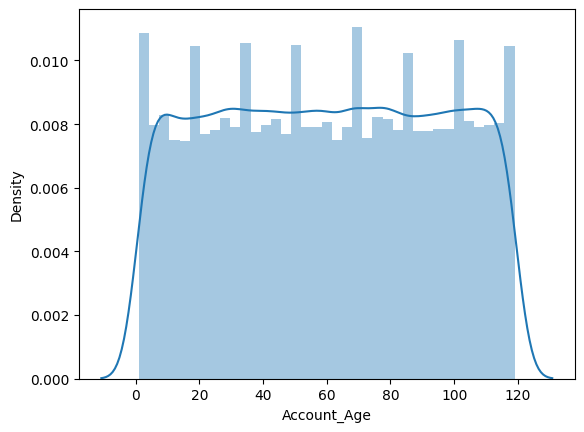

In [20]:
sns.distplot(fraud.Account_Age)

In [21]:
fraud.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


<Axes: xlabel='Device_Used', ylabel='Transaction_Amount'>

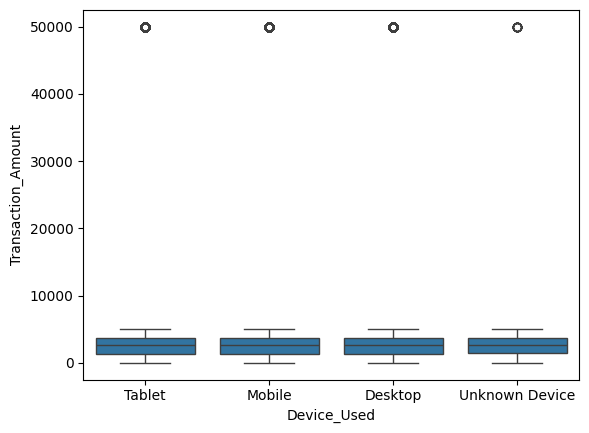

In [22]:
sns.boxplot(data=fraud,x='Device_Used',y='Transaction_Amount')

<Axes: xlabel='Payment_Method', ylabel='User_ID'>

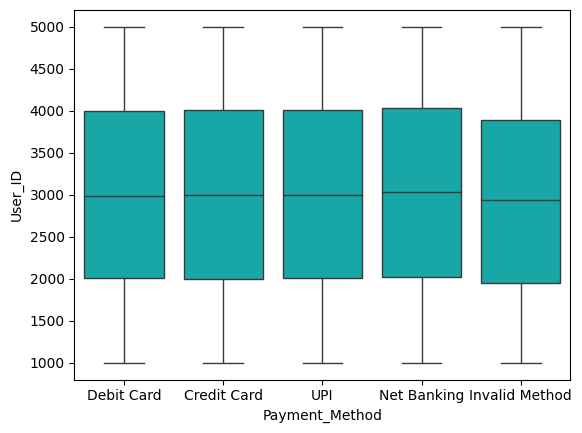

In [23]:
sns.boxplot(data=fraud,x='Payment_Method',y='User_ID',color='c')

<Axes: xlabel='Previous_Fraudulent_Transactions', ylabel='User_ID'>

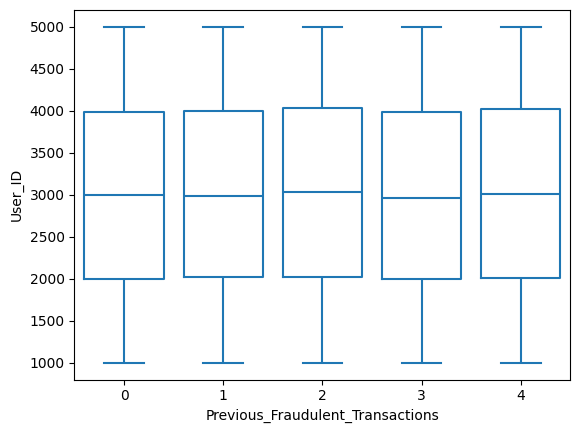

In [24]:
sns.boxplot(data=fraud,x='Previous_Fraudulent_Transactions',y='User_ID',fill=False)

In [25]:
fraud.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


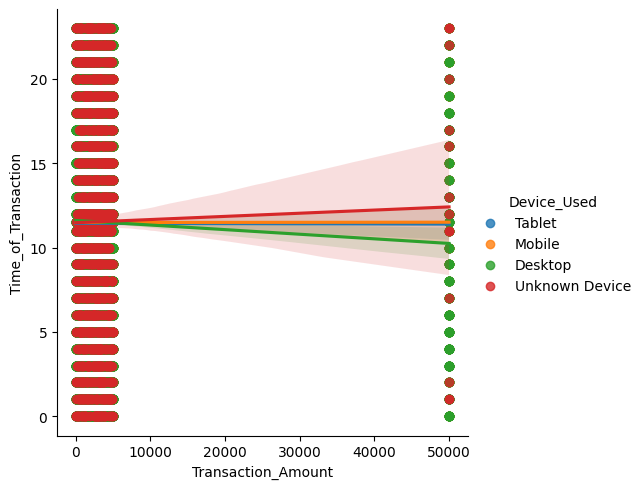

In [26]:
sns.lmplot(data=fraud,x='Transaction_Amount',y='Time_of_Transaction',hue='Device_Used')

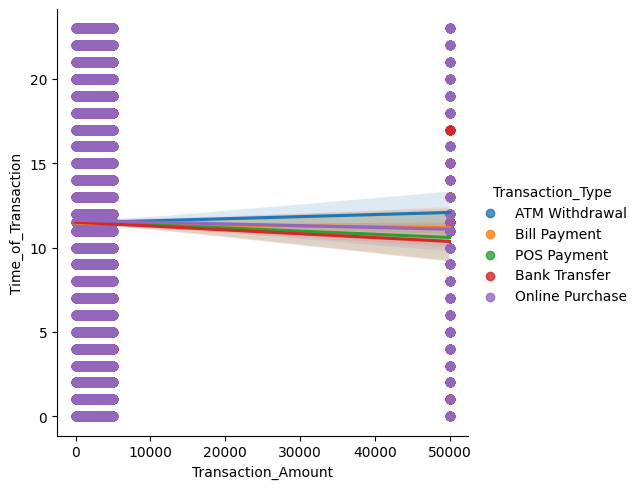

In [27]:
sns.lmplot(data=fraud,x='Transaction_Amount',y='Time_of_Transaction',hue='Transaction_Type')

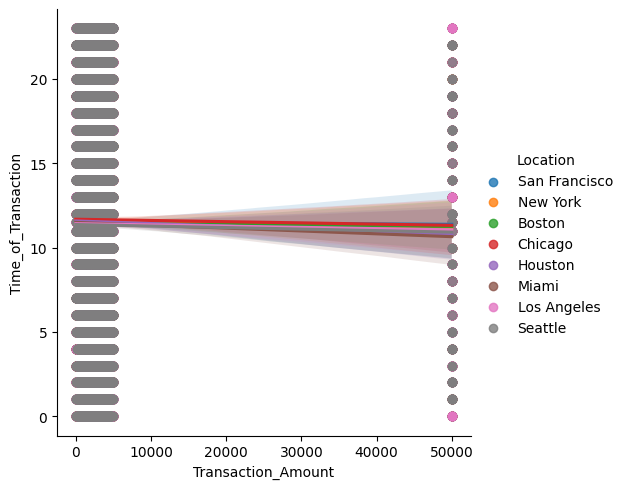

In [28]:
sns.lmplot(data=fraud,x='Transaction_Amount',y='Time_of_Transaction',hue='Location')

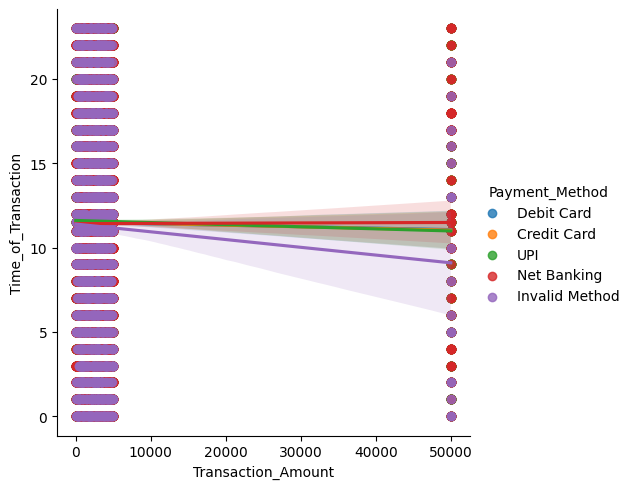

In [29]:
sns.lmplot(data=fraud,x='Transaction_Amount',y='Time_of_Transaction',hue='Payment_Method')

In [30]:
fraud.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


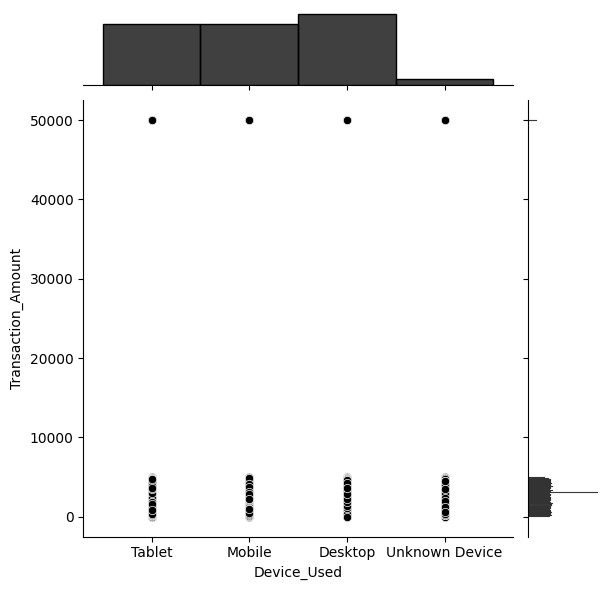

In [31]:
sns.jointplot(data=fraud,x='Device_Used',y='Transaction_Amount',color='k')

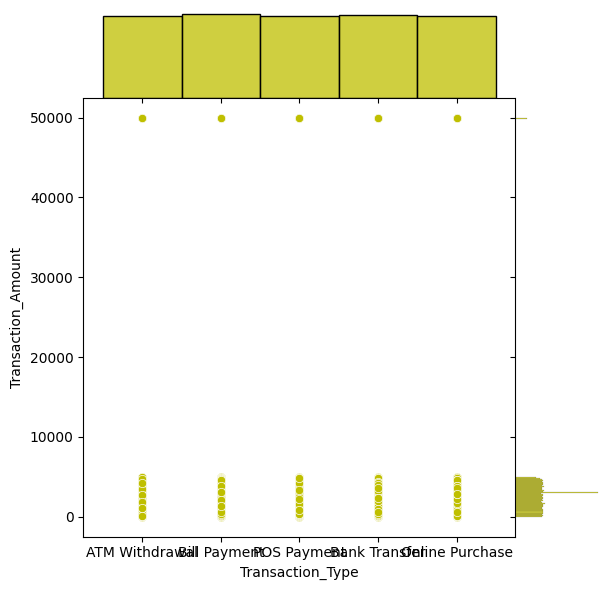

In [32]:
sns.jointplot(data=fraud,x='Transaction_Type',y='Transaction_Amount',color='y',markers='*', space=0,)

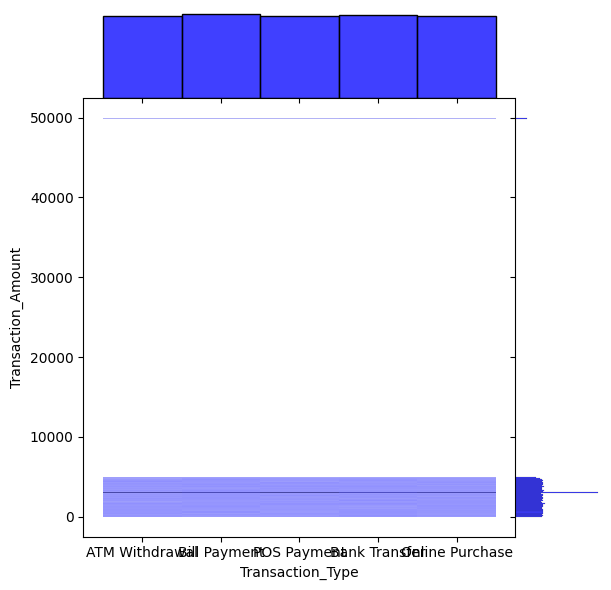

In [33]:
sns.jointplot(data=fraud,x='Transaction_Type',y='Transaction_Amount',color='b',space=0,kind='hist')

<Axes: xlabel='Fraudulent', ylabel='count'>

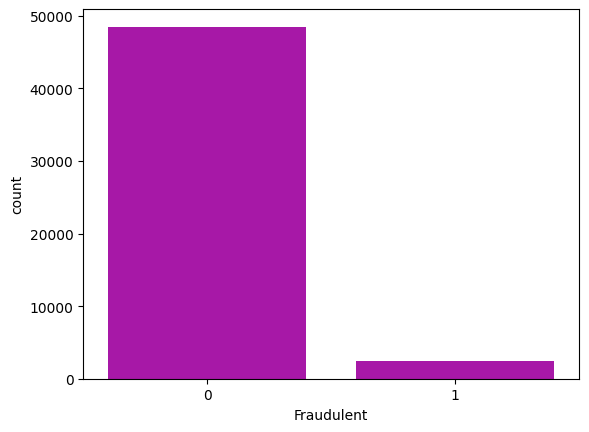

In [34]:
sns.countplot(data=fraud, x='Fraudulent',color='m')

<Axes: xlabel='Transaction_Type', ylabel='Transaction_Amount'>

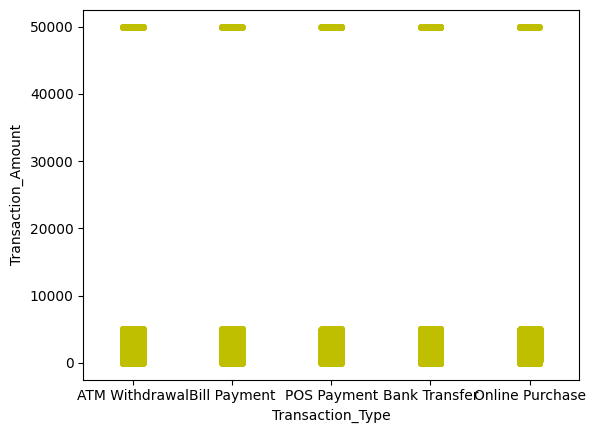

In [35]:
sns.stripplot(data=fraud,x='Transaction_Type',y='Transaction_Amount',color='y')

<Axes: xlabel='Transaction_Type', ylabel='Transaction_Amount'>

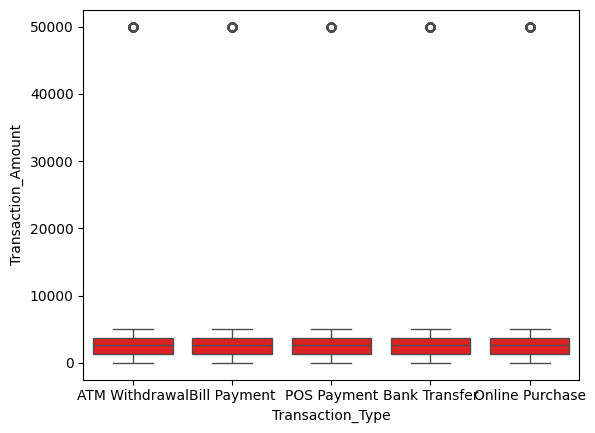

In [36]:
sns.boxplot(data=fraud,x='Transaction_Type',y='Transaction_Amount',color='r')

<Axes: xlabel='Location', ylabel='Transaction_Amount'>

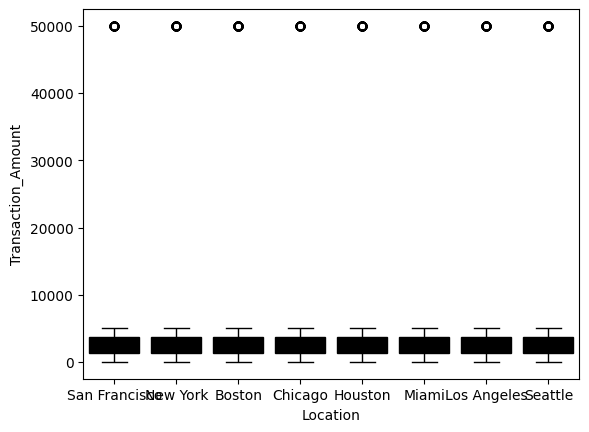

In [37]:
sns.boxplot(data=fraud,x='Location',y='Transaction_Amount',color='k')

<Axes: xlabel='Fraudulent', ylabel='User_ID'>

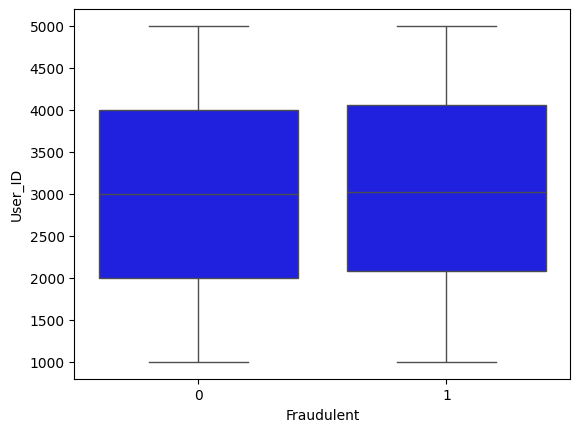

In [38]:
sns.boxplot(data=fraud, x='Fraudulent',y='User_ID',color='b')

In [39]:
fraud.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'],
      dtype='object')

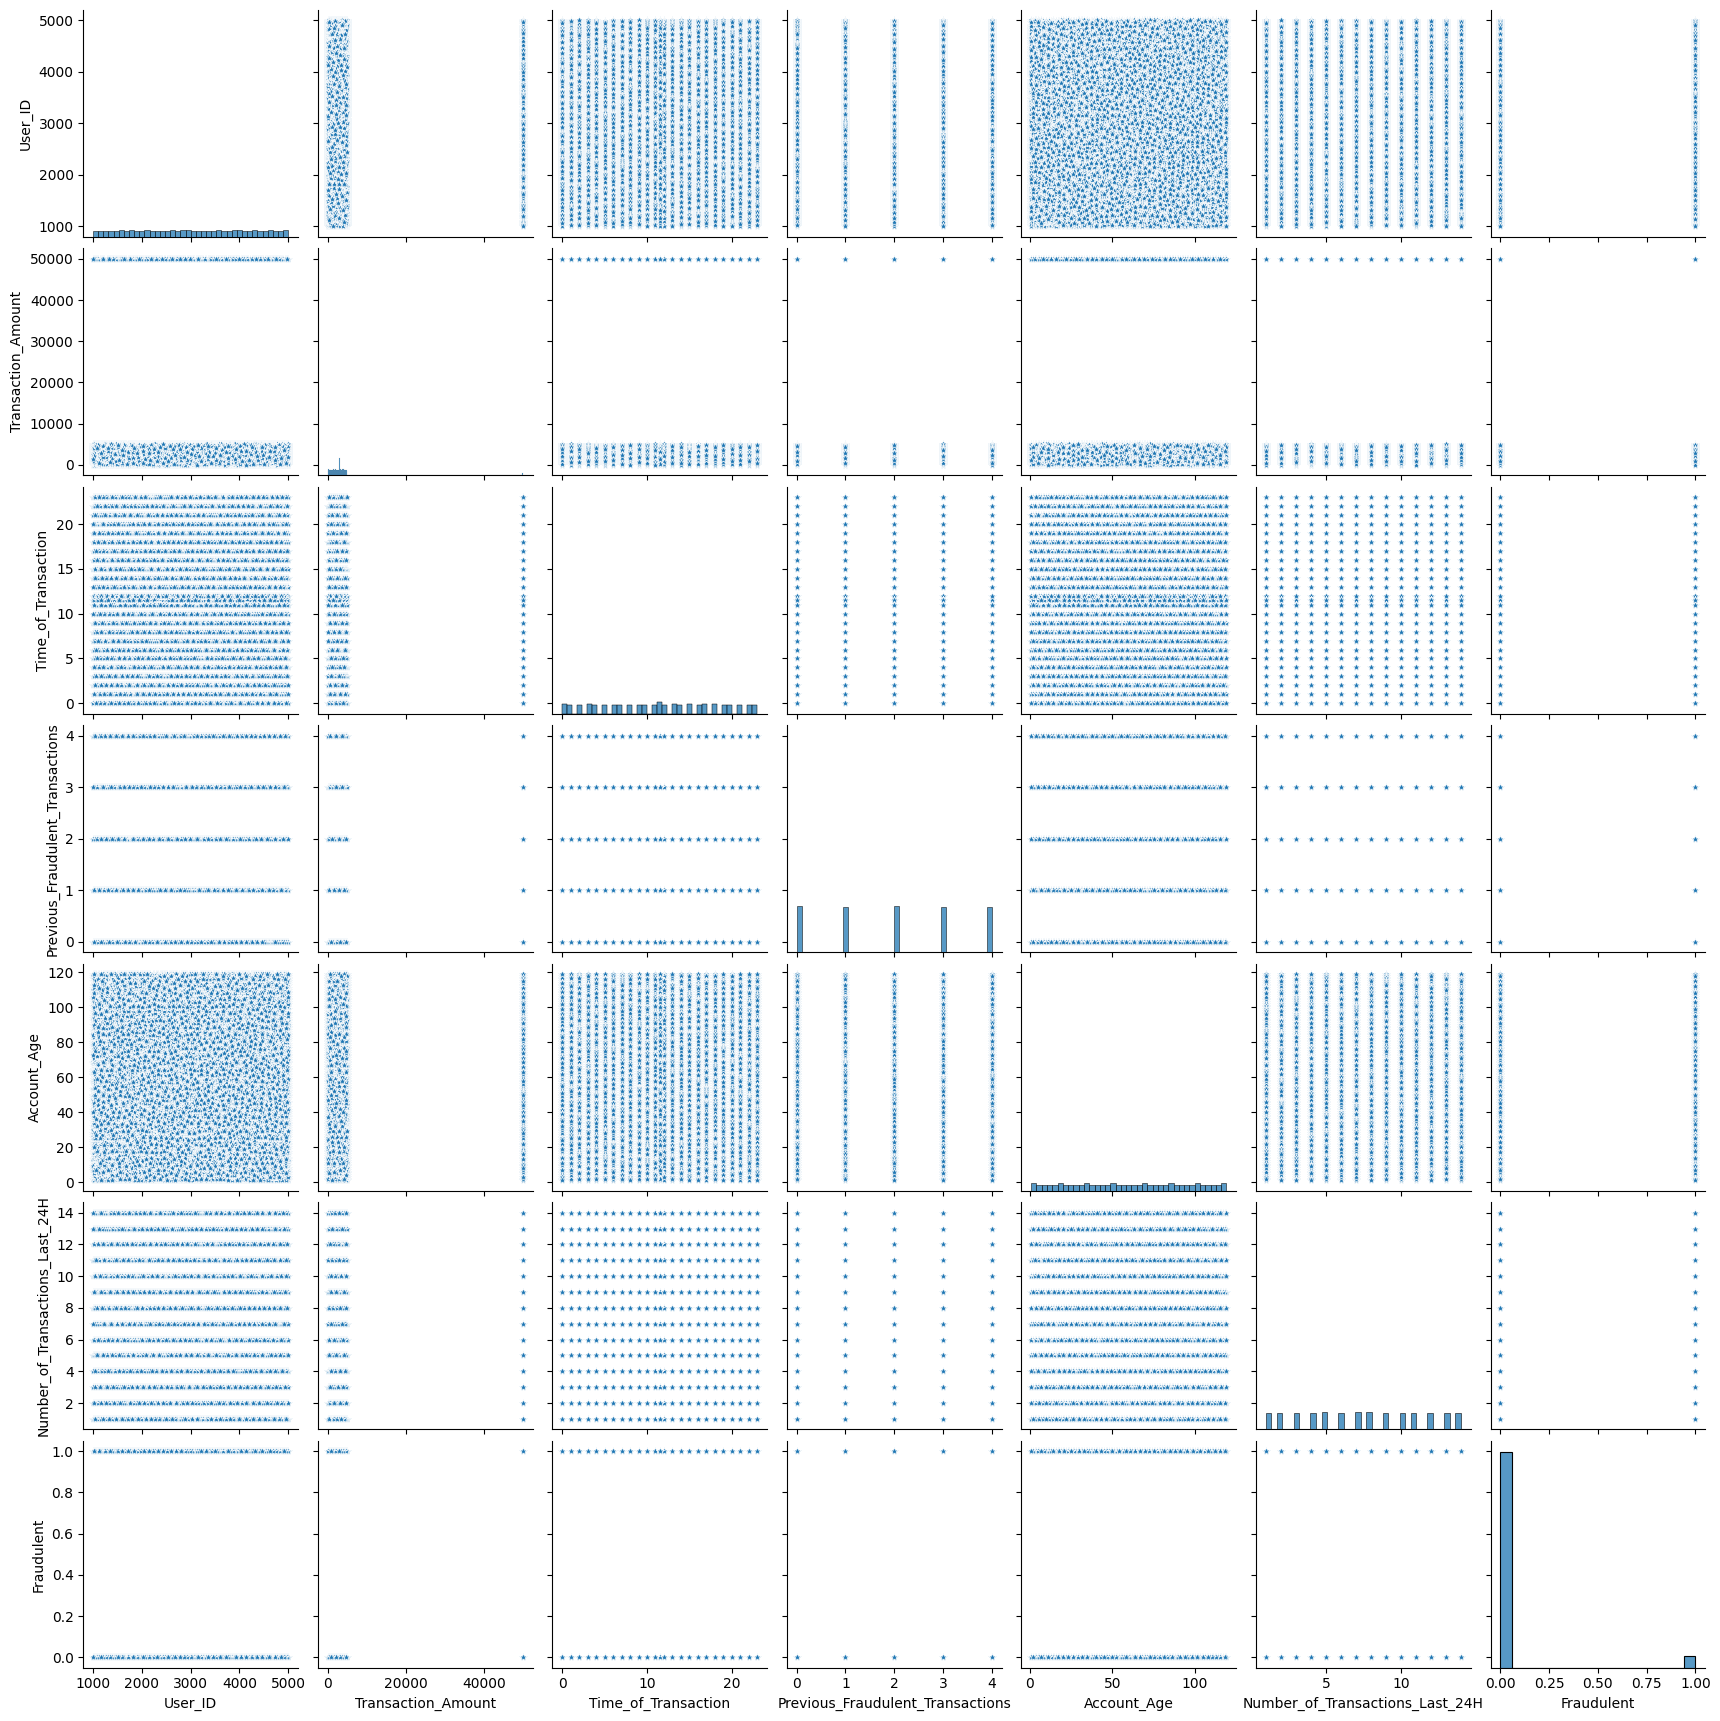

In [40]:
num_var = ['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type','Time_of_Transaction', 'Device_Used', 'Location','Previous_Fraudulent_Transactions', 'Account_Age','Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'] 
sns.pairplot(fraud[num_var], kind='scatter',markers='*',diag_kind='hist')
plt.show()

<Axes: xlabel='Fraudulent', ylabel='Transaction_Amount'>

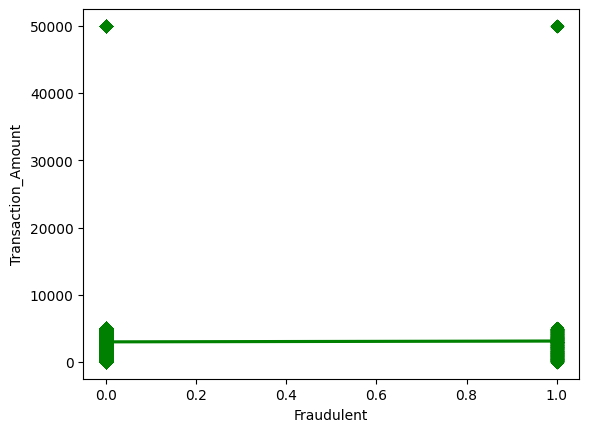

In [41]:
sns.regplot(data=fraud, x='Fraudulent',y='Transaction_Amount',color='g',marker='D')

In [42]:
fraud.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


<Axes: xlabel='Device_Used', ylabel='Transaction_Amount'>

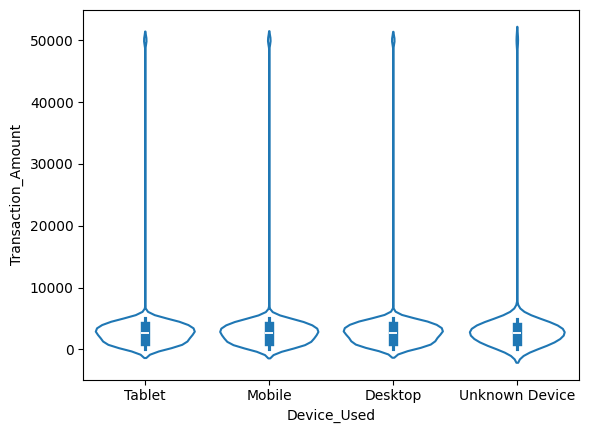

In [43]:
sns.violinplot(data=fraud, x='Device_Used',y='Transaction_Amount',fill=False)

<Axes: xlabel='Transaction_Type', ylabel='Transaction_Amount'>

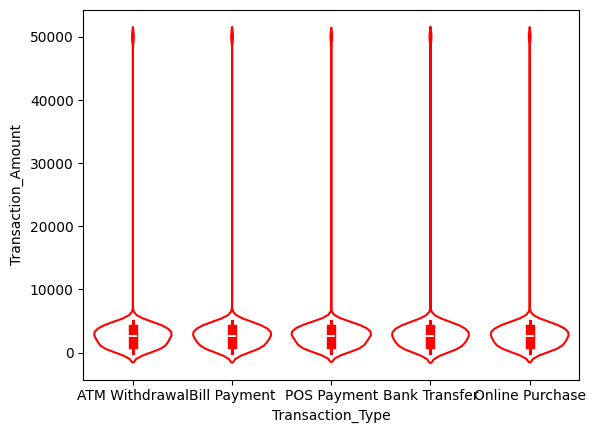

In [44]:
sns.violinplot(data=fraud, x='Transaction_Type',y='Transaction_Amount',fill=False,color='r')

<Axes: xlabel='Location', ylabel='Fraudulent'>

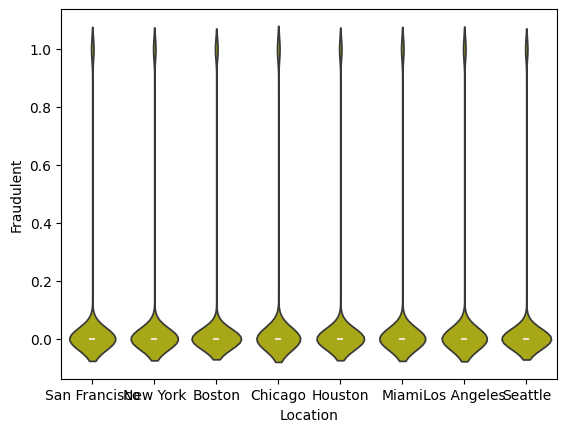

In [45]:
sns.violinplot(data=fraud, x='Location',y='Fraudulent',fill=True,color='y')

<Axes: xlabel='Payment_Method', ylabel='Transaction_Amount'>

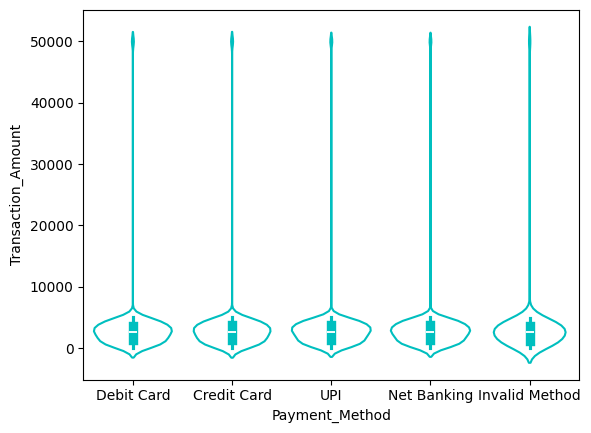

In [46]:
sns.violinplot(data=fraud, x='Payment_Method',y='Transaction_Amount',fill=False,color='c')